# Introduction

This is my first step towards the NLP modelling. I appreciate all your feedbacks and comments about my work. Feel free to ask questions,if any. Project mainly includes following steps
1. Data understanding : In this step, we observed mainy important aspect just by screening through data.
2. EDA, Feature Engineering and Data Cleaning: Key highlights at this step are fixing target for duplicated rows, emoji sentiment extraction, data cleaning (url,digits,stopwords,puctuation removal and lemmatization). For data cleaning we have used spacy at many steps.
3. Model Selection: In this step we have tried out random forest, adaboost,SVM classifier and seleted model based on highest f1 score.
4. Evaluation on holdout data

In [1]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)
import spacy

plt.rcParams["figure.figsize"] = (15,5)

# Data Understanding 


**Problem Statement:**
Predict whether a given tweet is about a real disaster or not. If so, predict 1. If not, predict 0.

**About Data:**
* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


In [3]:
# Loading data
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df = train.drop('target',axis=1)
traintest = pd.concat([df,test])
print(train.shape, test.shape, traintest.shape)
train.head(10)

(7613, 5) (3263, 4) (10876, 4)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [4]:
train.tail(10)

,id,keyword,location,text,target
7603,10862,NaN,NaN,Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: UPDATE: FIRE crews have evacuated up to 30 passengers who were tr... http://t.co/EYSVvzA7Qm,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a bomb and everyone had to evacuate so stay tuned if I blow up or not,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site mosque - Reuters via World - Google News - Wall ... http://t.co/nF4IculOje,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [5]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,"They'd probably still show more life than Arsenal did yesterday, eh? EH?"
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [6]:
test.tail(10)

,id,keyword,location,text
3253,10838,NaN,NaN,Malaysian PM confirms debris is from missing flight MH370 http://t.co/pfAvW5QyqE
3254,10845,NaN,NaN,Officials: Alabama home quarantined over possible Ebola case - Washington Times
3255,10856,NaN,NaN,See the 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released: Harun Ìàekdar ... http://t.co/hKuT5mSdtP @MsOreo_
3256,10857,NaN,NaN,To conference attendees! The blue line from the airport has DERAILED - please look into taking a taxi to the hotel! See you soon!
3257,10858,NaN,NaN,The death toll in a #IS-suicide car bombing on a #YPG position in the Village of Rajman in the eastern province of Hasaka has risen to 9
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm


In [7]:
train.isnull().sum(), test.isnull().sum()

(id          0   
 keyword     61  
 location    2533
 text        0   
 target      0   
 dtype: int64,
 id          0   
 keyword     26  
 location    1105
 text        0   
 dtype: int64)

In [8]:
train.nunique(dropna = False), test.nunique(dropna = False)

(id          7613
 keyword     222 
 location    3342
 text        7503
 target      2   
 dtype: int64,
 id          3263
 keyword     222 
 location    1603
 text        3243
 dtype: int64)

Observations:

We have screened many rows(actually more than 10) in the train and test set and observed following

1. Missing data is present in keyword and location column
2. looking at id and keyword column we can understand that the train test data was combined before and have sorted according to the keyword column and alocated id and test data was extracted randomly for each keyword type. Hence, unique number of keywords are same in train and test set
3. Text has no missing data at all in both train and test data.
4. Some texts are duplicated in both train and test. We will analyze this carefully in later part.
5. Location column is not much cleaned as it contains city or state or country or both or something vague as well as we have observed spelling mistakes at many places too. Hence, We can drop this column in future.
6. Text alway seem a good feature to classify the sentiment. But in given text column many punctuations, https.. url, capitalized letter present along with text. It needs to be cleaned before modelling.


# EDA, Feature Engineering, Data Cleaning

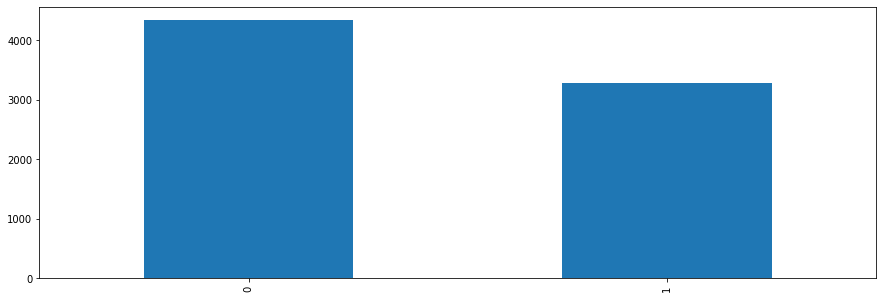

In [9]:
train['target'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Top 20 keywords for not real tweet')

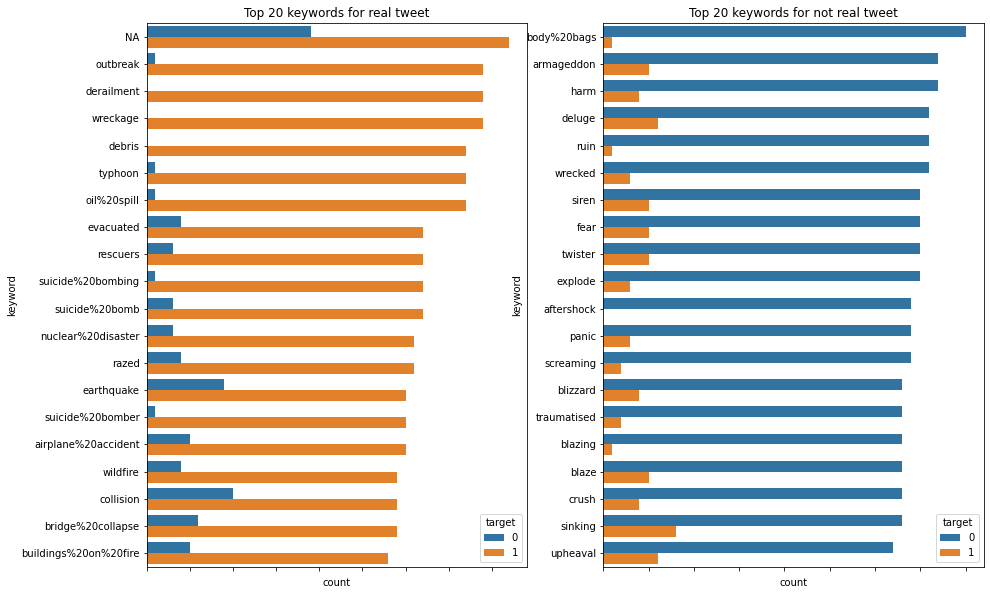

In [10]:
# top 20 keyword frequency in real and not real disaster tweets

# we will fill NaN value with 'NA' string
train['keyword'] = train['keyword'].fillna('NA')
real = train[train['target'] == 1]
noreal = train[train['target'] == 0]

# Data visualization for top 20 keywords for train set
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))
sns.countplot(y='keyword',hue = 'target', data = train,order = real['keyword'].value_counts()[:20].index, ax= ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 keywords for real tweet')
sns.countplot(y='keyword',hue = 'target', data = train,order = noreal['keyword'].value_counts()[:20].index, ax= ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 20 keywords for not real tweet')

Top 20 keyword list for real and not real disaster tweets are different as expected. For missing keyword the tweets are tend towards the real disaster. Keyword may play important role in decision making if we use tree based classifier.

Text(0.5, 1.0, 'Top 20 keywords for test set')

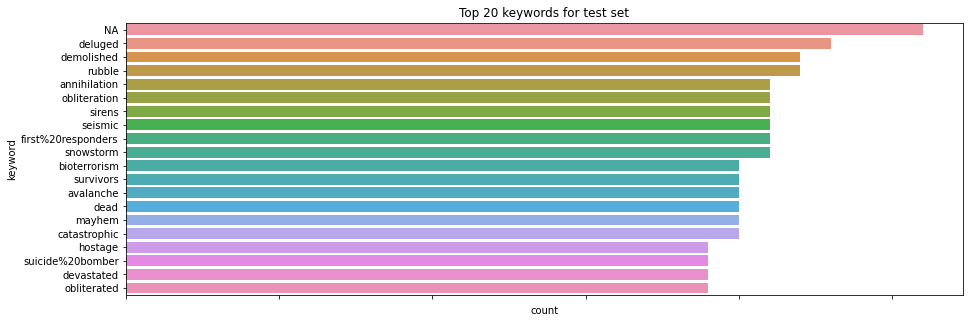

In [11]:
# Top 20 keyword for test set
test['keyword'] = test['keyword'].fillna('NA')
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))
sns.countplot(data = test, y = 'keyword', order = test['keyword'].value_counts(dropna = False)[:20].index,orient = 'h',ax= ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 keywords for test set')


## Duplicated row analysis

In [12]:
# Let's Analyze duplicate tweets
dup_tweets = train[train.duplicated(['text'], keep = False)].sort_values('text')
print('Total duplicates',dup_tweets.shape[0],'\nTotal unique',dup_tweets['text'].nunique(dropna = False))
dup_tweets.head(10)

Total duplicates 179 
Total unique 69


,id,keyword,location,text,target
4290,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,1
6363,9095,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6377,9113,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6378,9114,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
2828,4064,displaced,NaN,#KCA #VoteJKT48ID 12News: UPDATE: A family of 3 has been displaced after fired damaged housed near 90th and Osborn. Fire extinguished no iÛ_,1


Observations:
1. Many rows are duplicate except id column
2. At many places location columns are altered(We can ignore as we gonna drop this column)
3. Many rows are duplicated except id and target column (very surprising). It supposed that target must be same for duplicate tweets. 
3. At further step, we will remove duplicates and fixing our target column based on maximum voting (1 or 0). we will classify 50-50 votes as 1 for being on safer side.

## Fixing Target for duplicated text

In [13]:
disaster = dup_tweets.groupby(['keyword','text'])['target'].sum()
duplicates = dup_tweets.groupby(['keyword','text'])['target'].count()
whole = pd.DataFrame([disaster,duplicates], index=['disaster','Total']).T
whole['target'] = whole['disaster']/whole['Total']
whole.reset_index(inplace=True)
whole.head(10)

,keyword,text,disaster,Total,target
0,NA,#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,1,1,1.0
1,NA,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,1,1.0
2,NA,Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1,1,1.0
3,NA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,1,1.0
4,NA,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,1,1.0
5,ablaze,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0,2,0.0
6,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29,0,2,0.0
7,aftershock,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0,2,0.0
8,airplane%20accident,Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wednesday began examining t...,2,2,1.0
9,bioterrorism,To fight bioterrorism sir.,2,4,0.5


In [14]:
whole['target'] = whole['target'].astype(int)

# drop less significant column and duplicated rows based on text from test set 
train.drop(['location','id'], axis = 1 , inplace = True)
train.drop_duplicates(subset = 'text', keep = False, inplace =True)
print(train.shape)

# Adding filtered row in train set 
train = pd.concat([train,whole[['keyword','text','target']]],sort =False, axis =0)

print(train.shape)
train.head()


(7434, 3)
(7526, 3)


,keyword,text,target
0,NA,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,NA,Forest fire near La Ronge Sask. Canada,1
2,NA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,NA,"13,000 people receive #wildfires evacuation orders in California",1
4,NA,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


## Removing URL

In [15]:
import re

# removing urls starting with 'http' from text column
train['text'] = train['text'].str.replace(r'https?://\S*','', regex=True)


## Sentiment extraction from emoji

Emoji's are good source of sentiments.We have observed many emojis created with punctuation marks. we will focus on commonly used emojis. (Ref: https://en.wikipedia.org/wiki/List_of_emoticons#cite_note-cool-smileys-7)
> emoji with positive emotion - 
> happy, laugh, wink,playful -    :) :] , :D , ;), :P 

> Negative emotions - 
> sad,frawn, angry -     :( :C :[ ,:{, >:[ 

> We can create a new feature called 'emoji' classifying sentiments Positive, Negative, NA( Not Available).

NA          7478
Positive    33  
Negative    15  
Name: emoji, dtype: int64


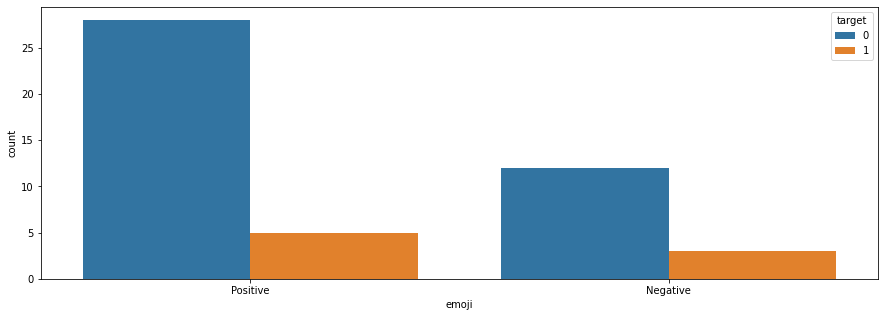

In [16]:
# Function for emoji sentiment extraction

def emoji_sentiment(df):
    df['emoji'] = 'NA'
    selected = df['text'].str.contains(r'[:;][D\]})]', regex = True)
    df.loc[selected,'emoji'] ='Positive'
    selected = df['text'].str.contains(r'>?[:;][(c\[/]', regex = True)
    df.loc[selected,'emoji'] = 'Negative'
    
    return df

train = emoji_sentiment(train)

print(train['emoji'].value_counts())
sns.countplot(x='emoji',hue='target',data=train,order=train['emoji'].value_counts(dropna = False)[1:].index)

We will ignore 'NA' categary in emoji while plotting as it  has very high value_count. It also observed that positive emojis are more likely to classify as 'no disater'(i.e.target-0). While for Negative emojis pattern is same but probability of classifying as no disaster is less somewhat.

## Removing numbers/digits and punctuation

In [17]:
import string

# remove digits occured in text as it not make much sense in modelling
train['text'] = train['text'].str.replace(r"\d","", regex= True)


# remove punctuation Remove : https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
def remove_punctuations(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

train['text'] = train['text'].apply(remove_punctuations)

## Creating TF-IDF vector

We will tokenize the text column ,lower the case and perform lemmatization, clean punctuation and stop words. It can be done using spacy. Finally we will create bag of words.

In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer

# It performs lemmatization, lowering case, stop word removal in text column and create bag of words data frame
parser = spacy.load('en_core_web_lg')

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    
    tokens = [ tok for tok in tokens if tok not in stop_words]
    
    return tokens


tf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer,analyzer = 'word', ngram_range = (1,1))

X = tf_vector.fit_transform(train['text'])
features = tf_vector.get_feature_names()

bow_df = pd.DataFrame(columns = features, data = X.toarray())
print(bow_df.shape)
bow_df.head()

(7526, 14869)


,,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aampb,aampw,...,åç,åè,åèmgnafricaå¨,åê,åêfedex,åêi,åêû,ì¢,ìñ,ìü
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.116825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Creating Final Data Frame

train.reset_index(inplace=True, drop = True)
y = train['target'] 
train.drop(['target','text'],axis = 1, inplace = True)
train = pd.concat([train,bow_df], axis =1)
print(train.shape)
train.head()



(7526, 14871)


,keyword,emoji,,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,...,åç,åè,åèmgnafricaå¨,åê,åêfedex,åêi,åêû,ì¢,ìñ,ìü
0,NA,NA,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NA,NA,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NA,NA,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NA,NA,0.116825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NA,NA,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Label Encodeing and compressing sparse matrix for faster execution 

from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

lekw = LabelEncoder()
lekw.fit(train['keyword'])
train['keyword'] = lekw.transform(train['keyword'])

leemo = LabelEncoder()
leemo.fit_transform(train['emoji'])
train['emoji'] = leemo.transform(train['emoji'])

print(train.columns)
X = csr_matrix(train.values)

print(X.shape, y.shape)

Index(['keyword', 'emoji', '', 'aa', 'aaaa', 'aaaaaaallll', 'aaaaaand',
       'aaarrrgghhh', 'aaceorg', 'aal',
       ...
       'åç', 'åè', 'åèmgnafricaå¨', 'åê', 'åêfedex', 'åêi', 'åêû', 'ì¢', 'ìñ',
       'ìü'],
      dtype='object', length=14871)
(7526, 14871) (7526,)


# Model Selection

In [21]:
# Rescaling input to standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = False)
scaler.fit(X)
X= scaler.transform(X)

In [22]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_auc_score, make_scorer
import xgboost as xgb


f1_scoring = make_scorer(f1_score,greater_is_better = True)

def model_evaluation(all_X,all_y):
    models = [
              { 'name' : 'Random Forest Regressor',
                'estimator': RandomForestClassifier(random_state = 1),
                'hyperparameters' : {'n_estimators': [300,700],
                                     'criterion':['gini','entropy'],
                                     'min_samples_split' : [2,4],
                                     'min_samples_leaf':[1,3],
                                     'n_jobs':[-1]                                     
                                    }
              },
        
        
             { 'name' : 'Support Vector Machine',
                'estimator': SVC(random_state=1),
                'hyperparameters' : {'kernel':['rbf','poly','sigmoid'],
                                    'C':[0.5,1,5],
                                    'class_weight' : [{0:0.7,1:1.0}]
                                    }
             },
             {'name' : 'Adaboost Classifier',
              'estimator': AdaBoostClassifier(random_state=1),
              'hyperparameters' : {'n_estimators':[100,300, 500, 700]}
             }
    ]
    for model in models:
        print(model['name'])
        print('*'*len(model['name']))    

        grid  = GridSearchCV(model['estimator'],param_grid= model['hyperparameters'],scoring = f1_scoring, cv = 3, n_jobs = -1)
        grid.fit(all_X,all_y)

        model["best_params"] = grid.best_params_
        model['best_model'] = grid.best_estimator_

        pred = grid.predict(all_X)
        score = f1_score(all_y,pred)
        print('f1 Score for best model: {:.4f}'.format(score))
        print('AUC score: {:.4f}'.format(roc_auc_score(all_y,pred)))
               
        print('Best Params:{}\n'.format(model['best_params']))
    
    return models



best_models = model_evaluation(X,y)


Random Forest Regressor
***********************
f1 Score for best model: 0.9867
AUC score: 0.9875
Best Params:{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 700, 'n_jobs': -1}

Support Vector Machine
**********************
f1 Score for best model: 0.9225
AUC score: 0.9309
Best Params:{'C': 0.5, 'class_weight': {0: 0.7, 1: 1.0}, 'kernel': 'sigmoid'}

Adaboost Classifier
*******************
f1 Score for best model: 0.8797
AUC score: 0.8941
Best Params:{'n_estimators': 700}



# Evaluation on Test set

We would create function which prepare our test data though the steps cleaning and feature engineering.

In [23]:
holdout = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
holdout_id =holdout['id']

holdout.drop(['id','location'],axis = 1,inplace = True)


In [24]:
def prepare_data(df):
    # fill NaN with NA
    df['keyword'] = df['keyword'].fillna('NA')
    print(df['keyword'].value_counts())
    
    # Remove URL
    df['text'] = df['text'].str.replace(r'https?://\S*','', regex=True)
    
    # Create emoji feature
    df = emoji_sentiment(df)
    
    # Remove Digits and punctuation
    df['text'] = df['text'].str.replace(r"\d","", regex= True)
    df['text'] = df['text'].apply(remove_punctuations)
    
    
    #TF IDF creation
    
    X = tf_vector.transform(df['text'])
    features = tf_vector.get_feature_names()
    bow_df = pd.DataFrame(columns = features, data = X.toarray())
    df = df.drop('text',axis = 1)
    df = pd.concat([df,bow_df],axis = 1)
    
    print(df.shape)
    
    return df

final_df = prepare_data(holdout)

final_df['keyword'] = lekw.transform(final_df['keyword'])
final_df['emoji'] = leemo.transform(final_df['emoji'])

print(final_df.columns)
final_df = csr_matrix(final_df.values)
final_df = scaler.transform(final_df)



NA                       26
deluged                  23
demolished               22
rubble                   22
annihilation             21
                         ..
forest%20fire            5 
radiation%20emergency    5 
fatalities               5 
inundation               4 
epicentre                1 
Name: keyword, Length: 222, dtype: int64
(3263, 14871)
Index(['keyword', 'emoji', '', 'aa', 'aaaa', 'aaaaaaallll', 'aaaaaand',
       'aaarrrgghhh', 'aaceorg', 'aal',
       ...
       'åç', 'åè', 'åèmgnafricaå¨', 'åê', 'åêfedex', 'åêi', 'åêû', 'ì¢', 'ìñ',
       'ìü'],
      dtype='object', length=14871)


In [25]:

def save_submission_file(holdout, model, filename="submission.csv"):
    
    predictions = model.predict(holdout)
    print(predictions)

    submission_df = {"id": holdout_id,"target": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

best_model = best_models[0]["best_model"]

save_submission_file(final_df, best_model)

[0 1 1 ... 0 1 0]


# Future Scope
We might improve our score in various ways:

1. Final feature columns include many less meaningful tokens, some of them caused because of spelling mistakes. If we will clean that, it might help.
2. In current version we have assigned NA to NaN values in keyword column. Instead of this if we could extract appropriate keywords for given tweets it may help.
3. bigram,trigram analysis and feature engineeiring might add some more improvement.